In [1]:
%%html
<style>
    .blue {
        background-color: #0074D9;
    }
    .green {
        background-color: #2ECC40;
    }
    
        .purple {
        background-color: #CC99FF;
    }
</style>

<div class="green">
Flight Price Prediction Problem
</div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
ds_folder=os.getcwd()

In [4]:
path=os.path.join(ds_folder,'Data_Train.xlsx')

In [5]:
train_data=pd.read_excel(path)

In [6]:
train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
train_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [9]:
train_data['Route'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Route, Length: 10683, dtype: bool

In [10]:
train_data[train_data['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [11]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


<div class="blue">
Drop record with No value in Total_Stops and Route
</div>    

In [12]:
train_data.dropna(inplace=True)

Check if there are any columns which has null value

In [13]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

<div class="blue">
Create a copy of train_data set
</div>    

In [14]:
train_data_copy=train_data.copy()

In [15]:
train_data_copy.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


<div class="blue">
Create a function to change the data type from object to datetime for fields like Date_of_Journey, Dep_Time, Arrival_Time
</div>    

In [16]:
train_data_copy.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [17]:
def change_into_Datetime(col):
    train_data_copy[col]=pd.to_datetime(train_data_copy[col])

In [18]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [19]:
for feature in ['Dep_Time','Arrival_Time','Date_of_Journey']:
    change_into_Datetime(feature)

<div class="blue">
Data type of  Date_of_Journey, Dep_Time, Arrival_Time changed to datetime
</div>    

In [20]:
train_data_copy.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

<div class="blue">
Extract Day,Month and Year from Date_of_Journey field into 3 separate fields in the data set
<div>    

In [21]:
train_data_copy['Date_of_Journey'].dt.day

0        24
1         5
2         6
3         5
4         3
         ..
10678     4
10679    27
10680    27
10681     3
10682     5
Name: Date_of_Journey, Length: 10682, dtype: int64

In [22]:
train_data_copy['Date_of_Journey_Day']=train_data_copy['Date_of_Journey'].dt.day

In [23]:
train_data_copy['Date_of_Journey_Month']=train_data_copy['Date_of_Journey'].dt.month

In [24]:
train_data_copy['Date_of_Journey_Year']=train_data_copy['Date_of_Journey'].dt.year

In [25]:
train_data_copy.dtypes

Airline                          object
Date_of_Journey          datetime64[ns]
Source                           object
Destination                      object
Route                            object
Dep_Time                 datetime64[ns]
Arrival_Time             datetime64[ns]
Duration                         object
Total_Stops                      object
Additional_Info                  object
Price                             int64
Date_of_Journey_Day               int64
Date_of_Journey_Month             int64
Date_of_Journey_Year              int64
dtype: object

In [26]:
train_data_copy.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_Day,Date_of_Journey_Month,Date_of_Journey_Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-10-03 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-10-03 05:50:00,2023-10-03 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-10-03 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019


<div class="blue">
Extract Hour and Minute from Dep_Time and Arrival_Time
</div>    

In [27]:
def extract_hour_min(df,col):
    df[col+'_hr']=df[col].dt.hour
    df[col+'_min']=df[col].dt.minute
    df[col].head(2)

In [28]:
extract_hour_min(train_data_copy,'Arrival_Time')

In [29]:
train_data_copy.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_Day,Date_of_Journey_Month,Date_of_Journey_Year,Arrival_Time_hr,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-10-03 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-10-03 05:50:00,2023-10-03 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,13,15


In [30]:
extract_hour_min(train_data_copy,'Dep_Time')

In [31]:
train_data_copy.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_Day,Date_of_Journey_Month,Date_of_Journey_Year,Arrival_Time_hr,Arrival_Time_min,Dep_Time_hr,Dep_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-10-03 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-10-03 05:50:00,2023-10-03 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,13,15,5,50


<div class="blue">
Now since we have extracted Hour and Minute from Dep_Time and Arrival_Time into new fields, lets drop these fields
use inplace=True in order to commit drop in the data frame
use axis=1 when droping column and axis=0 when droping row
    </div>

In [32]:
cols_to_drop=['Arrival_Time','Dep_Time']
train_data_copy.drop(cols_to_drop,axis=1,inplace=True)

In [33]:
train_data_copy.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_Day,Date_of_Journey_Month,Date_of_Journey_Year,Arrival_Time_hr,Arrival_Time_min,Dep_Time_hr,Dep_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,13,15,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,4,25,9,25


<div class="green">
Analysis 1<br>
Problem Statement - When will most of the flights take off?
</div>

In [34]:
# Write if elif statement to cateogrize departure hrs
def flight_dep_time(x):
    if x>4 and x<=8:
        return 'Early Morning'
    if x>8 and x<=12:
        return 'Morning'
    if x>12 and x<=16:
        return 'Noon'
    if x>16 and x<=20:
        return 'Evening'
    if x>20 and x<=24:
        return 'Night'
    else:
        return 'Late Night'

In [35]:
train_data_copy['Dep_Time_hr'].apply(flight_dep_time)

0                Night
1        Early Morning
2              Morning
3              Evening
4                 Noon
             ...      
10678          Evening
10679          Evening
10680    Early Morning
10681          Morning
10682          Morning
Name: Dep_Time_hr, Length: 10682, dtype: object

In [36]:
train_data_copy['Dep_Time_hr'].apply(flight_dep_time).value_counts()

Early Morning    2880
Evening          2357
Morning          2209
Noon             1731
Night            1040
Late Night        465
Name: Dep_Time_hr, dtype: int64

<Axes: >

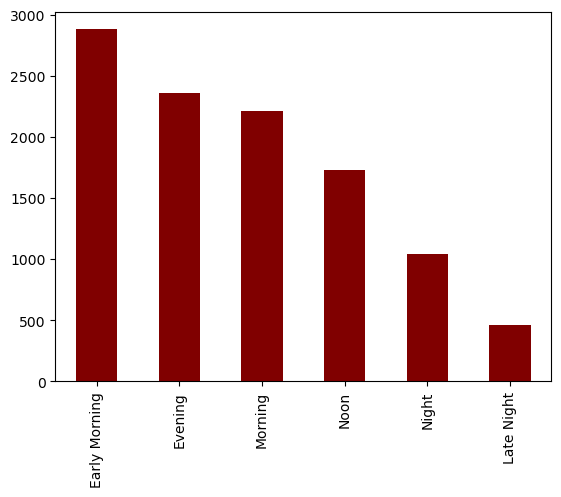

In [37]:
train_data_copy['Dep_Time_hr'].apply(flight_dep_time).value_counts().plot(kind='bar',color='maroon')

<div class="blue">
To make chart interactive use other package as below
    </div>

In [38]:
!pip install plotly

In [39]:
!pip install cufflinks

In [40]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot,iplot, init_notebook_mode, download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()

In [41]:
train_data_copy['Dep_Time_hr'].apply(flight_dep_time).value_counts().iplot(kind='bar',color='maroon')

In [42]:
train_data_copy.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_Day,Date_of_Journey_Month,Date_of_Journey_Year,Arrival_Time_hr,Arrival_Time_min,Dep_Time_hr,Dep_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,13,15,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,4,25,9,25


<div class="blue">
Extract Hour and Minute part from field Duration into two new columns. Make sure to add 0H or 0M where hour or minute is absent first.</div>

In [43]:
def preprossesor_duration(x):
    if 'h' not in x:
        x='0h'+' '+x
    elif 'm' not in x:
        x=x+' '+'0m'
    return x
        

In [44]:
train_data_copy['Duration'].apply(preprossesor_duration)

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [45]:
train_data_copy['Duration']=train_data_copy['Duration'].apply(preprossesor_duration)

In [46]:
train_data_copy['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

<div class="blue">
#example to split hour from string field
'2h 5m'.split(' ')[0][0:-1]
use this calculation to form lambda function to extract hour and minute part from Duration field. Also make sure to convert the data type to int instead of string
</div>

In [47]:
train_data_copy['Duration_hours']=train_data_copy['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))

In [48]:
train_data_copy['Duration_Mins']=train_data_copy['Duration'].apply(lambda x:int(x.split(' ')[1][0:-1]))

In [49]:
train_data_copy.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_Day,Date_of_Journey_Month,Date_of_Journey_Year,Arrival_Time_hr,Arrival_Time_min,Dep_Time_hr,Dep_Time_min,Duration_hours,Duration_Mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,13,15,5,50,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,4,25,9,25,19,0


In [50]:
train_data_copy.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price',
       'Date_of_Journey_Day', 'Date_of_Journey_Month', 'Date_of_Journey_Year',
       'Arrival_Time_hr', 'Arrival_Time_min', 'Dep_Time_hr', 'Dep_Time_min',
       'Duration_hours', 'Duration_Mins'],
      dtype='object')

<div class="green">
Analysis
2 Problem Statement - Lets analyse if Duration impacts on price or not<br>
Solution - <br>
    1) Calculate Total duration either in mins or hours<br>
    2) Create Scatter plot or Regression line for Total Duration and Price to establish their relation
   </div>

In [51]:
train_data_copy['Duration_total_mins']=train_data_copy['Duration_hours']*60+train_data_copy['Duration_Mins']*1

In [52]:
train_data_copy.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_Day,Date_of_Journey_Month,Date_of_Journey_Year,Arrival_Time_hr,Arrival_Time_min,Dep_Time_hr,Dep_Time_min,Duration_hours,Duration_Mins,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50,170
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,13,15,5,50,7,25,445


<div class="blue">
    Scatter Plot using library matplotlib.
</div>

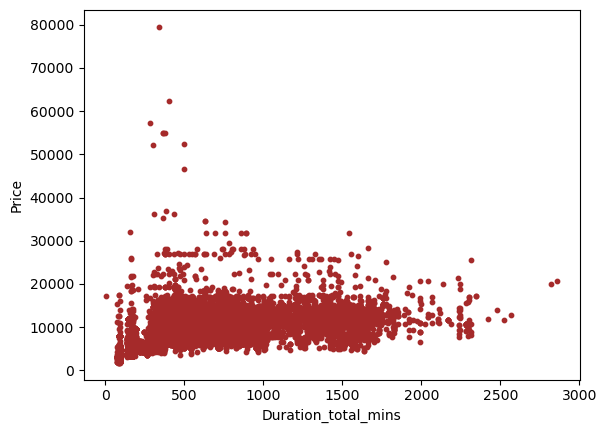

In [53]:
#plt.scatter(x=train_data_copy['Duration_total_mins'],y=train_data_copy['Price'])

plt.scatter(x='Duration_total_mins',y='Price',c='brown',data=train_data_copy,s=10)
plt.xlabel('Duration_total_mins')
plt.ylabel('Price')
plt.show()


<div class="blue">
    Scatter Plot using library seaborne. add hue parameter for total_stop field
</div>    

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

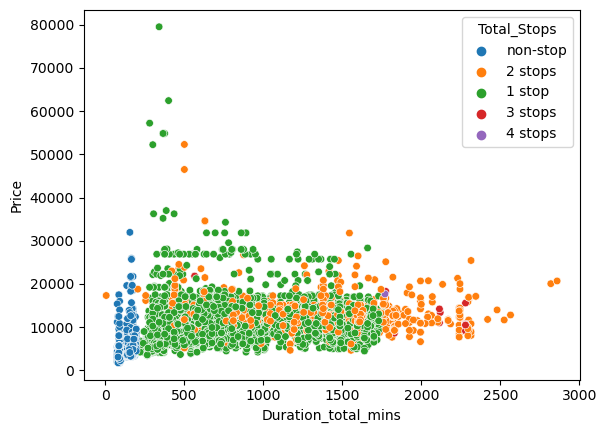

In [54]:
sns.scatterplot(x='Duration_total_mins',y='Price',hue='Total_Stops',data=train_data_copy,s=30)

<div class="blue">
    Regression line using library matplot. Using stats model for best fit line.
</div>   

In [55]:
#sns.lmplot(x='Duration_total_mins',y='Price',data=train_data_copy)
import statsmodels.api as sm
y=train_data_copy['Price']
x1=train_data_copy['Duration_total_mins']
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     3685.
Date:                Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                        00:35:11   Log-Likelihood:            -1.0369e+05
No. Observations:               10682   AIC:                         2.074e+05
Df Residuals:                   10680   BIC:                         2.074e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                6129.7792     62.080     98.741      0.000    6008.092    6251.467
Duration_total_mins     4.5993      0.076     60.703      0.000       4.451       4.748
==============================================================================
Omnibus:                     7842.527   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           359755.408
Skew:                           3.043   Prob(JB):                         0.00
Kurtosis:                      30.771   Cond. No.                     1.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

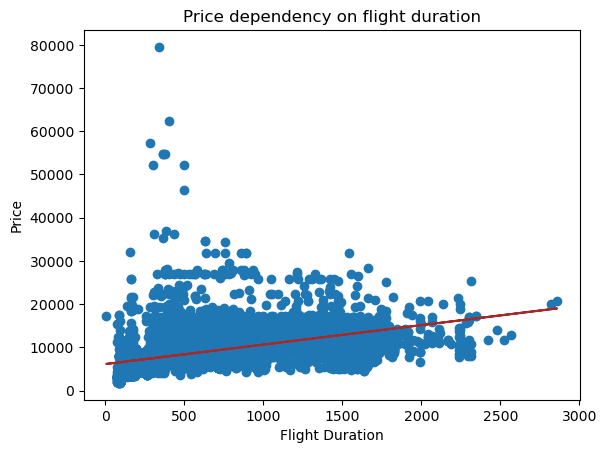

In [56]:
yhat=6129+4.5*x1
plt.scatter(x1,y)
plt.xlabel('Flight Duration')
plt.ylabel('Price')
plt.title('Price dependency on flight duration')
plt.plot(x1,yhat,c='brown')
plt.show()

<div class="blue">
    Regression line using library seaborn.
</div>  

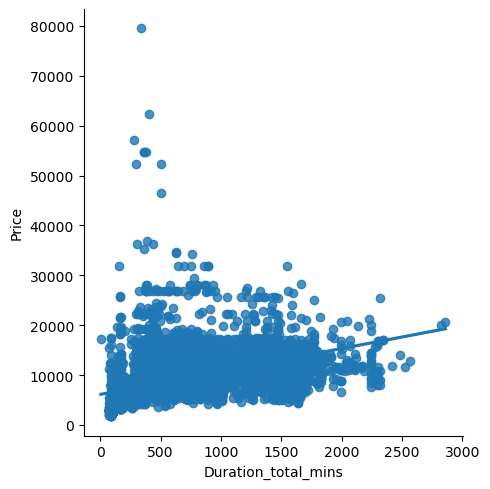

In [57]:
sns.lmplot(x='Duration_total_mins',y='Price',data=train_data_copy)

<div class="green">
Analysis 3
Problem Statement - <br>
    1) On Which Route Jet Airways is mostly used ?<br>
    Solution -  Calculate route count of airlines where airline is Jet Airways <br>
    2) Airline Vs Price Analysis <br>
    Solution - Create  box plot for Airline and Price to establish their relation
    <br>

   </div>

In [58]:
#train_data_copy[train_data_copy['Airline']=='Jet Airways'].groupby('Route').count()

train_data_copy[train_data_copy['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

<Axes: xlabel='Airline', ylabel='Price'>

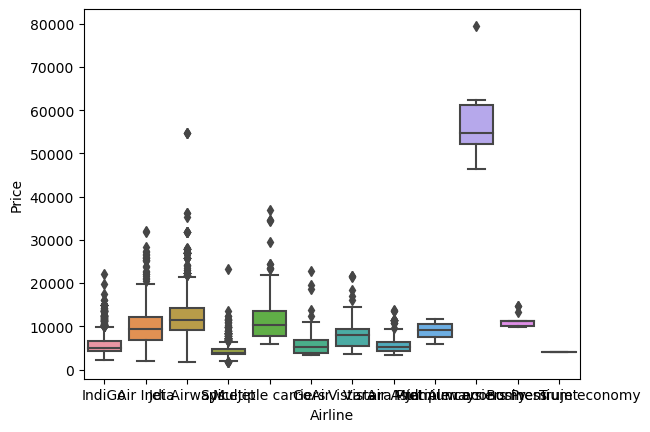

In [59]:
#plt.boxplot(x='Airline',vert='Price',data=train_data_copy)
sns.boxplot(x='Airline',y='Price',data=train_data_copy)

<div class="blue">
To fix overlapping issue in above box plot use xticks as in below code. Also sort in desc order of price
</div>
<div class="green">
    <br>
    Use Seaborn to show box plot for - Quantitive and Categorical variable ie 'Airline' vs 'Price' <BR>
    Use Matplotlib to show box plot for Quantitive Variable

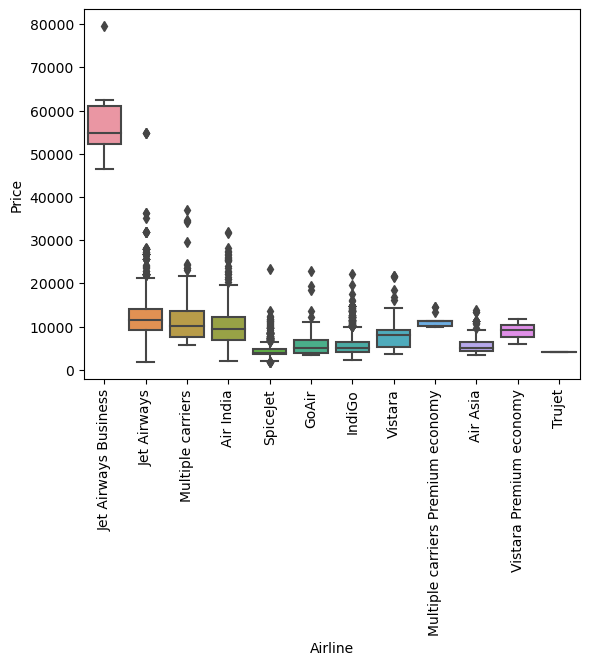

In [60]:
# using seaborn here
sns.boxplot(x='Airline',y='Price',data=train_data_copy.sort_values('Price', ascending=False))
plt.xticks(rotation='vertical')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x145cebe10>,
 'caps': [<matplotlib.lines.Line2D at 0x145cfd1d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x145ceb610>],
 'medians': [<matplotlib.lines.Line2D at 0x145cfe0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x145cfead0>],
 'means': []}

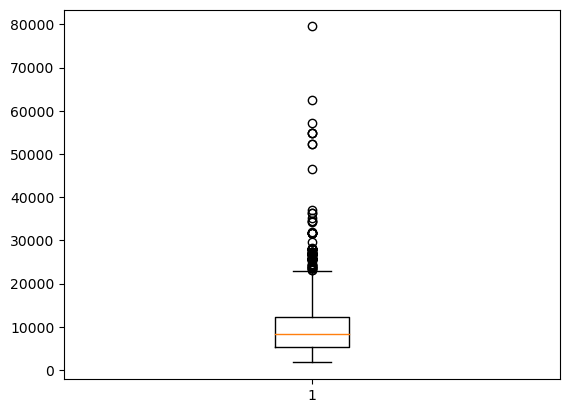

In [61]:
# Using matplotlib here
train_data_copy[['Airline','Price']]
plt.boxplot(x=train_data_copy[['Price']])

<div class="purple">
    Feature Encoding  - Machine Learning models do not work with categorical data and to fit this data into the machine learning <br> model it needs to be converted into numerical data which is called Hot Encoding or Feature Encoding.
<br>
•	Normal Data – Use “Onehot Encoding”
<br>
•	Ordinal Date( data follows order) – Use “Label Encoding”

</div>    

<div class="green">
Problem Statement - Apply feature encoding on column "source" <br>
Solution - 1) List all the categorical columns and Numerical columns <br>
           2) Find unique values in the column "source". <br>
           3) Apply onehot encoding on "source" column ie create a column for each unique source value and place a value 1 for <br> the row where the source value is present.
    
    
</div>    

<div class="blue">
Step 1) List all the categorical columns and Numerical columns
    </div>

In [62]:
#cat_col=[]
#for a in train_data_copy.columns:
#    if train_data_copy[a].dtype=="object":
#        cat_col.append(a)
#        print(cat_col)

### Step 1) List all the categorical columns and Numerical columns

cat_col=[ col for col in train_data_copy.columns if  train_data_copy[col].dtype=='object' ]
num_col=[ col for col in train_data_copy.columns if  train_data_copy[col].dtype!='object' ]

In [63]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [64]:
num_col

['Date_of_Journey',
 'Price',
 'Date_of_Journey_Day',
 'Date_of_Journey_Month',
 'Date_of_Journey_Year',
 'Arrival_Time_hr',
 'Arrival_Time_min',
 'Dep_Time_hr',
 'Dep_Time_min',
 'Duration_hours',
 'Duration_Mins',
 'Duration_total_mins']

<div class="blue">
step 2) Find unique values in the column "source".    
    </div>

In [65]:
train_data_copy['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

<div class="blue">
   step 3) Apply onehot encoding on "source" column ie create a column for each unique source value and place a value 1 for
the row where the source value is present
 <br>
    in order to apply operation on all the rows of data frame use "apply" function. Here passing lambda function as parameter to "apply" funtion to assign 1 or 0
</div>    

In [66]:
for src_value in train_data_copy['Source'].unique():    
    train_data_copy['Source'+'_'+src_value]=train_data_copy['Source'].apply(lambda x:1 if x==src_value else 0)
     

  

In [67]:
train_data_copy

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_Day,...,Dep_Time_hr,Dep_Time_min,Duration_hours,Duration_Mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,22,20,2,50,170,1,0,0,0,0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,5,50,7,25,445,0,1,0,0,0
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,...,9,25,19,0,1140,0,0,1,0,0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,...,18,5,5,25,325,0,1,0,0,0
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,...,16,50,4,45,285,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,4,...,19,55,2,30,150,0,1,0,0,0
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,...,20,45,2,35,155,0,1,0,0,0
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,3h 0m,non-stop,No info,7229,27,...,8,20,3,0,180,1,0,0,0,0
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,3,...,11,30,2,40,160,1,0,0,0,0


<Div class="green">
Problem Statement - Apply target guided encoding on column "Airline"<br>
NB - column 'Airline' has large no of unique values and onehot encoding will cause dimensionality issue ie addition of large <br> number of columns. So let's apply target guided encoding.    
</div>    

In [68]:
train_data_copy['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

<div class="blue">
    Airline column has 12 unique values and onehot encoding will add 12 different columns in the data frame.
<div>    

In [69]:
train_data_copy['Airline'].unique().size

12

<div class='purple'>
 Learning group by<br>
 Notes - applying group by function. Avg price of flight group by route and airline
</div>    

In [70]:
train_data_copy.groupby(['Route','Airline','Total_Stops'])['Price'].mean().sort_values()

Route                  Airline               Total_Stops
BOM → HYD              SpiceJet              non-stop        2419.859504
                       Air India             non-stop        3448.704082
CCU → BLR              GoAir                 non-stop        3514.000000
BOM → HYD              IndiGo                non-stop        3639.194872
MAA → CCU              SpiceJet              non-stop        3993.523438
                                                                ...     
BOM → JDH → DEL → HYD  Air India             2 stops        23879.000000
BOM → DED → DEL → HYD  Jet Airways           2 stops        24115.000000
DEL → ATQ → BOM → COK  Jet Airways Business  2 stops        49387.500000
BLR → MAA → DEL        Jet Airways Business  1 stop         57209.000000
BLR → BOM → DEL        Jet Airways Business  1 stop         64722.666667
Name: Price, Length: 209, dtype: float64

<div class="blue">
    In order to apply target guided encoding, Let's find avg price of each airline and then assign a priority order or rank <br>to each airline based on order of mean price higher mean to lower mean price. eg.<br>          
       Trujet                                4140.000000       1<br>
       SpiceJet                              4338.284841       2<br>
       Air Asia                              5590.260188       3<br>
</div>    

In [71]:
train_data_copy.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [72]:
train_data_copy.groupby(['Airline'])['Price'].mean().sort_values().index

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [73]:
airlines=train_data_copy.groupby(['Airline'])['Price'].mean().sort_values().index

<div class="blue">
    use enumerate() function on list airlines created above to create a key value pair which then can be used to create a <br>dictionary
    </div>

In [74]:
for key,index in enumerate(airlines,0):
    print(key,index)


0 Trujet
1 SpiceJet
2 Air Asia
3 IndiGo
4 GoAir
5 Vistara
6 Vistara Premium economy
7 Air India
8 Multiple carriers
9 Multiple carriers Premium economy
10 Jet Airways
11 Jet Airways Business


In [75]:
dict_airlines={index:key for key,index in enumerate(airlines,0)}
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

<div class="blue">
        used dict_airlines dictionary to map train_data_copy['Airline']
</div>    

In [76]:
train_data_copy['Airline'].map(dict_airlines)

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [77]:
train_data_copy['Airline']=train_data_copy['Airline'].map(dict_airlines)

<div class="blue">
Airline column data is changed to numeric value as present in dictionary dict_airlines
</div>

In [78]:
train_data_copy.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_Day,...,Dep_Time_hr,Dep_Time_min,Duration_hours,Duration_Mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,22,20,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,5,50,7,25,445,0,1,0,0,0
2,10,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,...,9,25,19,0,1140,0,0,1,0,0
3,3,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,...,18,5,5,25,325,0,1,0,0,0
4,3,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,...,16,50,4,45,285,1,0,0,0,0


<div class="green">
Problem Statement - Data Integrity in Destination column.<br>
Soluction - Destination column has two airport closest to each other ie New Delhi and Delhi. Replace Delhi with New Delhi
</div>    

In [79]:
train_data_copy['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [80]:
train_data_copy['Destination'].replace('Delhi','New Delhi',inplace=True)

In [81]:
train_data_copy['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

<Div class="green">
Problem Statement - Apply target guided encoding on column "Destination"<br>
NB - column 'Destination' has large no of unique values and onehot encoding will cause dimensionality issue ie addition of large <br> number of columns. So let's apply target guided encoding same way as did for column Airline.    
</div>

In [82]:
train_data_copy.groupby(['Destination'])['Price'].mean().sort_values()

Destination
Kolkata       4789.892388
Hyderabad     5059.708752
New Delhi     8017.464269
Banglore      9158.389411
Cochin       10540.113536
Name: Price, dtype: float64

In [83]:
dest=train_data_copy.groupby(['Destination'])['Price'].mean().sort_values().index
dest

Index(['Kolkata', 'Hyderabad', 'New Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [84]:
#for key,dest in enumerate(dest,0):
 #   print(key,dest)

In [85]:
dest_dict={dest:key for key,dest in enumerate(dest,0)}

In [86]:
dest_dict

{'Kolkata': 0, 'Hyderabad': 1, 'New Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [87]:
train_data_copy['Destination']=train_data_copy['Destination'].map(dest_dict)

In [88]:
train_data_copy.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_Day,...,Dep_Time_hr,Dep_Time_min,Duration_hours,Duration_Mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,22,20,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,5,50,7,25,445,0,1,0,0,0
2,10,2019-09-06,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,...,9,25,19,0,1140,0,0,1,0,0
3,3,2019-12-05,Kolkata,3,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,...,18,5,5,25,325,0,1,0,0,0
4,3,2019-01-03,Banglore,2,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,...,16,50,4,45,285,1,0,0,0,0


<div class="green">
    Problem Statement - Apply labeled encoding on column "Total_Stops" which is Ordinal in nature<br>
    Solution - create a dictionary with key as no of stops and value as numeric in ascending order. Then use this dictionary as parameter in map function to apply mapping on each 'Total_Stops' row. 
</div>    

In [89]:
train_data_copy['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [90]:
dict_stops={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
dict_stops

{'non-stop': 0, '2 stops': 2, '1 stop': 1, '3 stops': 3, '4 stops': 4}

In [91]:
train_data_copy['Total_Stops']=train_data_copy['Total_Stops'].map(dict_stops)

In [92]:
train_data_copy.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_Day,...,Dep_Time_hr,Dep_Time_min,Duration_hours,Duration_Mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,22,20,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,5,...,5,50,7,25,445,0,1,0,0,0
2,10,2019-09-06,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2,No info,13882,6,...,9,25,19,0,1140,0,0,1,0,0
3,3,2019-12-05,Kolkata,3,CCU → NAG → BLR,5h 25m,1,No info,6218,5,...,18,5,5,25,325,0,1,0,0,0
4,3,2019-01-03,Banglore,2,BLR → NAG → DEL,4h 45m,1,No info,13302,3,...,16,50,4,45,285,1,0,0,0,0


<div class="green">
    Problem Statement - Remove Unnecessary feature/columns<br>
    Solution - Find columns that are of no importance and drop it 
</div>  

In [93]:
train_data_copy.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price',
       'Date_of_Journey_Day', 'Date_of_Journey_Month', 'Date_of_Journey_Year',
       'Arrival_Time_hr', 'Arrival_Time_min', 'Dep_Time_hr', 'Dep_Time_min',
       'Duration_hours', 'Duration_Mins', 'Duration_total_mins',
       'Source_Banglore', 'Source_Kolkata', 'Source_Delhi', 'Source_Chennai',
       'Source_Mumbai'],
      dtype='object')

<div class="blue">
# Additional_Info is of no importance as most of rows(78%) has 'No info' as value.<br>
# Route is of no importance as we can interpret using Total_Stops feature.<br>
# Date_of_Journey is redundant as we already have journey day, month and year<br>
# Duration_total_mins is also not requred<br>
# Source is not required as we have done encoding on source<br>
# Date_of_Journey_Year has only one value ie 2019 for all rows. for ML its not required
    
</div>    

In [94]:

train_data_copy['Additional_Info'].value_counts()/len(train_data_copy)*100

No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: Additional_Info, dtype: float64

In [95]:
train_data_copy['Date_of_Journey_Year'].value_counts()

2019    10682
Name: Date_of_Journey_Year, dtype: int64

<div class="blue">
    dropping columns below.<br>
    use axis=1 for when dropping vertical<br>
    use inplace=True as we are updating the data frame itself
</div>    

In [96]:
train_data_copy.drop(columns=['Additional_Info','Route','Date_of_Journey','Duration_total_mins','Source','Date_of_Journey_Year'],axis=1,inplace=True)

In [97]:
train_data_copy.head(3)

,Airline,Destination,Duration,Total_Stops,Price,Date_of_Journey_Day,Date_of_Journey_Month,Arrival_Time_hr,Arrival_Time_min,Dep_Time_hr,Dep_Time_min,Duration_hours,Duration_Mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,2h 50m,0,3897,24,3,1,10,22,20,2,50,1,0,0,0,0
1,7,3,7h 25m,2,7662,5,1,13,15,5,50,7,25,0,1,0,0,0
2,10,4,19h 0m,2,13882,6,9,4,25,9,25,19,0,0,0,1,0,0


<div class="blue">
# Duration is also not required because we already have Duration_hours and Duration_Mins. so drop it
</div>    

In [98]:
train_data_copy.drop(columns=['Duration'],axis=1,inplace=True)

In [99]:
train_data_copy.head(3)

,Airline,Destination,Total_Stops,Price,Date_of_Journey_Day,Date_of_Journey_Month,Arrival_Time_hr,Arrival_Time_min,Dep_Time_hr,Dep_Time_min,Duration_hours,Duration_Mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,1,10,22,20,2,50,1,0,0,0,0
1,7,3,2,7662,5,1,13,15,5,50,7,25,0,1,0,0,0
2,10,4,2,13882,6,9,4,25,9,25,19,0,0,0,1,0,0


<div class="green">
    1.Problem Statement - Outlier Detection <br>
    2. Problem Statement - How to deal with Outlier<br>
    Solution
<br> use histogram, box plot to detect any outlier
</div>

<Axes: xlabel='Price'>

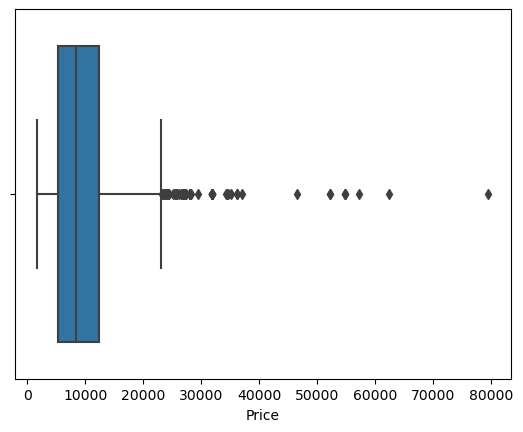

In [100]:

sns.boxplot(data=train_data_copy,x=train_data_copy['Price'])

<Axes: ylabel='Density'>

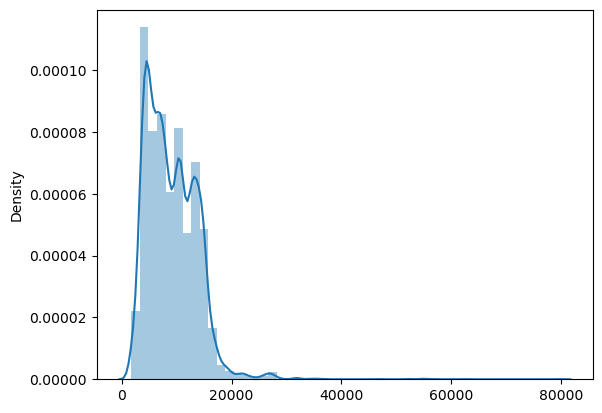

In [101]:
sns.distplot(x=train_data_copy['Price'])

<Axes: xlabel='Price'>

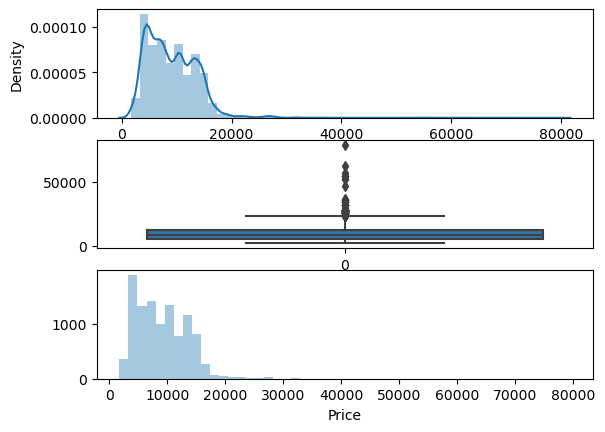

In [102]:
fig1,(ax1,ax2,ax3)=plt.subplots(3,1)

sns.distplot(train_data_copy['Price'],ax=ax1)
sns.boxplot(data=train_data_copy['Price'],ax=ax2)
sns.distplot(train_data_copy['Price'],ax=ax3,kde=False)


       

<div class="blue">
    creating a generic function to plot different graphs using same axis.<br>
    below graphs shows right skewed, ie some ticket's price are costlier than 20000 and those are outliers because most of the prices are between 0 and 20000.
 </div>

In [103]:
def plot(df,col):
    fig,(ax1,ax2,ax3)=plt.subplots(3,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2, orient='h')
    sns.distplot(df[col],ax=ax3, kde=False) # kde is kernal density estimation

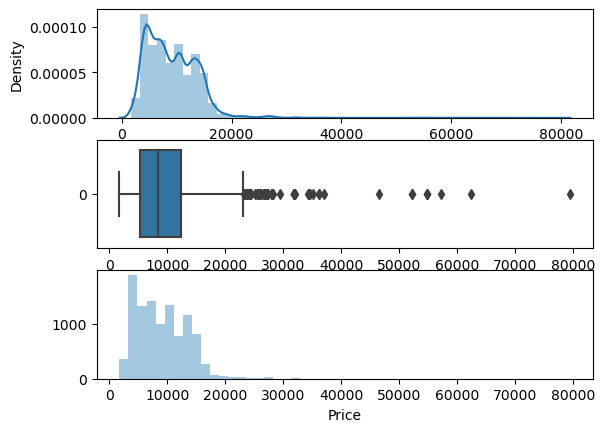

In [104]:
plot(train_data_copy,'Price')

<div class="blue">
   Technical Defination of Outliers.<br>
    any data point which is<br>
>(Q3 + 1.5 * IQR) or  <(Q1 - 1.5 * IQR)<br>
are considered as Outlier. Where IQR is inter quartile range which is nothing but data point between Q1 and Q3.<br>
Q1 is 25%<br>
Q3 is 75%<br>
so IQR =75%-25%=range or area where 50% of data falls

 </div>

In [105]:
Q1=train_data_copy['Price'].quantile(.25)
Q3=train_data_copy['Price'].quantile(.75)
IQR=Q3-Q1
maximum=Q3 + 1.5 * IQR
minimum=Q1 - 1.5 * IQR

In [106]:
maximum

23017.0

In [107]:
minimum

-5367.0

<div class="blue">
    So any 'Price'  which is greater than maximum ie 23017.0 or less than minimum ie -5367.0 is outlier
</div>    

In [108]:
l=[ticket_price for ticket_price in train_data_copy['Price'] if ticket_price >maximum or ticket_price<minimum]
print("There are : {a} Outliers in the data set. \nThese are the Outliers in the data set {b}:".format(a=len(l),b=l))

    
    

There are : 94 Outliers in the data set. 
These are the Outliers in the data set [27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]:


<div class="blue">
    Let's consider domain expert asked to consider any price greate than 35000 consider as outlier and replace any price greater than 35000 with the median price.<br>
    Using numpy "where" function to simply replace.
</div>    

In [109]:
np.where(train_data_copy['Price']>=35000)

(array([  396,   657,  1478,  2099,  2618,  2693,  2924,  5372,  5439,
         5719,  7351,  9714, 10363]),)

In [110]:
train_data_copy['Price']=np.where(train_data_copy['Price']>=35000,train_data_copy['Price'].median(),train_data_copy['Price'])

<div class="blue">
 after replacing outlier price( price which is greater than 35000) with the median price check the replot the graphs by calling plot(df,col) we defined earlier and compare with previous graphs.
</div>    

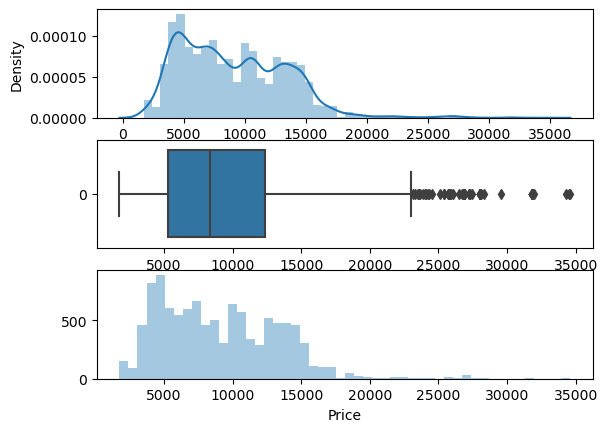

In [111]:
plot(train_data_copy,'Price')

<div class=

<div class="green">
    Problem Statemen - Feature Selection<br>
    Solution - detertime target/dependent variables and source/independent variables. And use mutual_info_regression() method of feature_selection submodule from scikit-learn module to determine Mutual Information Score between each source and target variable and see how strongly they are related.
</div>    

<div class="blue">
    we have <br>
    Target/Dependent variable is :Price<br>
    Source/Independent variables are: Source,Target,Airline, Total Stops etc
</div>    
          

In [112]:
#pip install -U scikit-learn

In [113]:
y=train_data_copy['Price'] # dependent feature
X=train_data_copy.drop('Price',axis=1) # independent features

In [114]:
from sklearn.feature_selection import mutual_info_regression


In [115]:
mi_score=mutual_info_regression(X,y)

In [116]:
mi_score

array([0.98117868, 0.99509708, 0.79462684, 0.19097778, 0.23937658,
       0.39403351, 0.35328104, 0.33604348, 0.26233989, 0.4731884 ,
       0.34282093, 0.39444454, 0.451003  , 0.51638844, 0.12291268,
       0.20175272])

In [117]:
imp_df=pd.DataFrame(mi_score,index=X.columns)

In [118]:
imp_df

,0
Airline,0.981179
Destination,0.995097
Total_Stops,0.794627
Date_of_Journey_Day,0.190978
Date_of_Journey_Month,0.239377
Arrival_Time_hr,0.394034
Arrival_Time_min,0.353281
Dep_Time_hr,0.336043
Dep_Time_min,0.262340
Duration_hours,0.473188


In [119]:
imp_df.columns=['importance']

<div class="blue">
    below features have strong MI score and it make sense to keep these features for building our model
    </div>

In [120]:
imp_df.sort_values(by='importance',ascending=False)

,importance
Destination,0.995097
Airline,0.981179
Total_Stops,0.794627
Source_Delhi,0.516388
Duration_hours,0.473188
Source_Kolkata,0.451003
Source_Banglore,0.394445
Arrival_Time_hr,0.394034
Arrival_Time_min,0.353281
Duration_Mins,0.342821


<div class="green">
    1.Problem Statement - Build ML Model <br>
    2.Problem Statement - Save the model<br>
    Solution
<br> 
</div>

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [123]:
from sklearn.ensemble import RandomForestRegressor

In [124]:
ml_model=RandomForestRegressor()

In [125]:
ml_model.fit(X_train,y_train)

RandomForestRegressor()

In [126]:
y_predict=ml_model.predict(X_test)

In [127]:
y_predict

array([16759.08,  6346.26,  8889.92, ...,  3496.15,  6398.28,  6996.27])

<div class="blue">
    predicted flight price by airline, destination, total stops
    </div>

In [128]:
#train_data_copy['Predicted_Flight_Price']=pd.DataFrame(y_predict)
#train_data_copy[['Airline','Destination','Total_Stops','Price','Predicted_Flight_Price']].sort_values(by=['Airline','Destination','Total_Stops'],ascending=True)

<div class="blue">
    check the acuracy of predicted value by model vs test value using r2_score() method of metrics in sklearn
    </div>

In [129]:
from sklearn import metrics

In [130]:
metrics.r2_score(y_test,y_predict)

0.8095139442100469

<div class="blue">
    Save the model ie dump the model in a file.
    </div>

In [131]:
import pickle

In [132]:
path_pickle_file=os.path.join(ds_folder,"rf_random.pk1")

In [133]:
file_model_write=open(path_pickle_file,'wb')

In [134]:
pickle.dump(ml_model,file_model_write)

<div class="blue">
    load the model back ie read the file. run the model on same test data set and check the predicted value's acuracy against the test data.
    </blue>

In [135]:
file_model_read=open(path_pickle_file,'rb')

In [136]:
forest=pickle.load(file_model_read)

In [137]:
y_predict2=forest.predict(X_test)

In [138]:
metrics.r2_score(y_test,y_predict2)

0.8095139442100469

<div class="green">
     1.Problem Statement - How to define your own evaluatino metrics <br>
     Solution - define a function to calculate MAPE ie Mean absolute percentage error.<br>
     2.Problem Statement - How to automate ML pipeline<br>
     Solution - define a function which takes model algorith as input and train, test and check the score
    </div>

In [139]:
def mape(y_true,y_pred):
   y_true, y_pred = np.array(y_true), np.array(y_pred)
   return np.mean(np.abs((y_true - y_pred)/y_true))*100


In [140]:
mape(y_test,y_predict)

13.2815762149658

In [141]:
from sklearn import metrics


In [142]:
def predict(ml_model):
    model=ml_model.fit(X_train,y_train)
    print("Training score :{}".format(model.score(X_train,y_train)))
    y_predict=model.predict(X_test)
    print("Predicted prices are :{}".format(y_predict))
    print("\n")
    r2_score=metrics.r2_score(y_test,y_predict)
    print("r2 score :{}".format(r2_score))
    print("Mean Abs Error :{}".format(metrics.mean_absolute_error(y_test,y_predict)))
    print("Mean Squared Error MSE :{}".format(metrics.mean_squared_error(y_test,y_predict)))
    print("Root Mean Squared Error RMSE  :{}".format(np.sqrt(metrics.mean_squared_error(y_test,y_predict))))
    print("Mean absolute percentage error MAPE  :{}".format(mape(y_test,y_predict)))
    sns.distplot(y_test-y_predict)

<div class="blue">
    use RandomForestRegressor ML algorithm
   </div>

In [143]:
from sklearn.ensemble import RandomForestRegressor

Training score :0.9516639360005984
Predicted prices are :[16755.79  6687.12  8799.78 ...  3517.71  6205.84  7012.42]


r2 score :0.8083957537498124
Mean Abs Error :1182.8787037576383
Mean Squared Error MSE :3730074.7601951463
Root Mean Squared Error RMSE  :1931.3401461666836
Mean absolute percentage error MAPE  :13.257736091037012


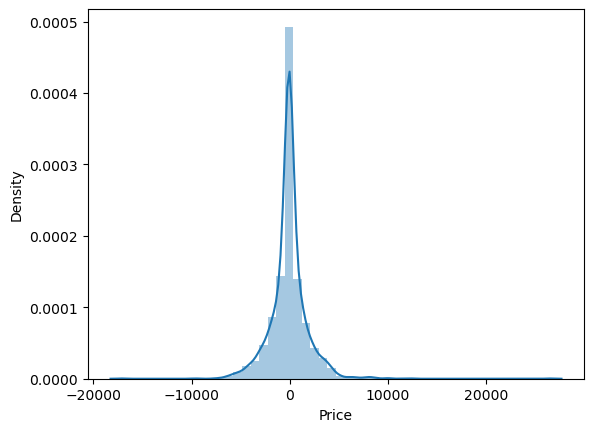

In [144]:
predict(RandomForestRegressor())

<div class="blue">
    use DecisionTreeRegressor ML algorithm
   </div>

Training score :0.966591628243878
Predicted prices are :[16840.  6976.  8610. ...  3419.  5797.  6818.]


r2 score :0.6892483690583872
Mean Abs Error :1384.2514663671534
Mean Squared Error MSE :6049588.346550813
Root Mean Squared Error RMSE  :2459.591093363044
Mean absolute percentage error MAPE  :15.217742483763613


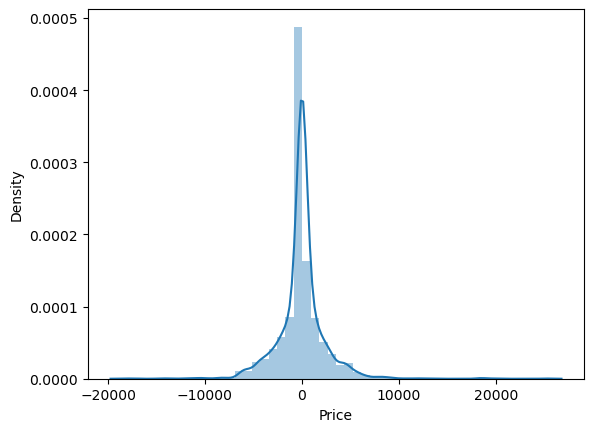

In [145]:
from sklearn.tree import DecisionTreeRegressor
predict(DecisionTreeRegressor())